In [1]:
import numpy as np
import pandas as pd
import os

import scanpy as sc
from anndata import AnnData, concat
from matplotlib.transforms import Bbox

# from scvi.model.utils import mde


from matplotlib import pyplot as plt
import seaborn as sns

from scipy import sparse
import gc
from upsetplot import plot as UpSet
from itertools import product
import networkx as nx

from scipy.cluster import hierarchy

import re
import subprocess

import h5py

import itertools

from scnym.api import scnym_api

import pymn

from collections import Counter

In [3]:
# import tensorflow as tf
# import tensorboard as tb
# tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

pd.set_option('display.max_columns', 500)

In [5]:
### Directory TM_combined_datasets_SA_ann_obs
combined_datasets = sc.read_h5ad(filename = "TM_combined_datasets_SA_ann.h5ad")
obs_plk = pd.read_pickle("TM_combined_datasets_SA_ann_obs.plk")
combined_datasets.obs = obs_plk

In [6]:
hvg = sc.read("../output/hvg_integrated.h5ad")
SA_exps = combined_datasets[combined_datasets.obs["study_id"].isin(['SA_pilot', 'SA_final'])]

In [7]:
hvg_cells = hvg.obs_names
SA_exp_names = SA_exps.obs_names

SA_hvg_cells = [x for x in SA_exp_names if x[:-2] in hvg_cells]


SA_cellname_counts = Counter([x[:-2] for x in SA_hvg_cells])
SA_unique_names = [x for x in SA_hvg_cells if SA_cellname_counts[x[:-2]] == 1]


SA_exps_subset = SA_exps[SA_unique_names]

SA_exps_subset.obs_names = [x[:-2] for x in SA_exps_subset.obs_names]

hvg_subset = hvg[SA_exps_subset.obs_names]

hvg_subset.obs["scNym_condensed"] = SA_exps_subset.obs["scNym_condensed"]
hvg_subset.obs["scNym_condensed_confidence"] = SA_exps_subset.obs["scNym_condensed_confidence"]

/tmp/ipykernel_60397/1692993861.py:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  hvg_subset.obs["scNym_condensed"] = SA_exps_subset.obs["scNym_condensed"]


### HSC population

In [8]:
# ### Directory TM_hvg_subset_HSC_SA_ann_obs
# hvg_subset_HSC = sc.read_h5ad(filename = "hvg_lineage_annotation.h5ad")
# obs_plk = pd.read_pickle("hvg_lineage_annotation.plk")
# hvg_subset_HSC.obs = obs_plk

In [9]:
HSC_cell_mapping = {"0":"CMP",
               "1": "ST HSC",
               "2": "B cell progenitor",
               "3": "CLP",
               "4": "GMP",
               "5": "Neutro",
               "6": "EoP"}

In [10]:
# sc.pp.normalize_total(hvg_subset_HSC, target_sum=1e6)
# sc.pp.log1p(hvg_subset_HSC)


In [11]:
sc.tl.pca(hvg_subset_HSC, svd_solver='arpack')
sc.pp.neighbors(hvg_subset_HSC, n_neighbors=10, n_pcs=40)
sc.tl.umap(hvg_subset_HSC)

2023-03-25 16:20:10.350897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /users/anna.hakobyan/centos/usr/lib:/users/anna.hakobyan/centos/usr/lib64:/lib:/lib64:/usr/lib:/usr/lib64
2023-03-25 16:20:10.350965: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
sc.tl.leiden(hvg_subset_HSC, resolution=0.4, n_iterations=100)

In [13]:
hvg_subset_HSC.obs["Mariem_annotation"] = hvg_subset_HSC.obs["leiden"].map(HSC_cell_mapping)

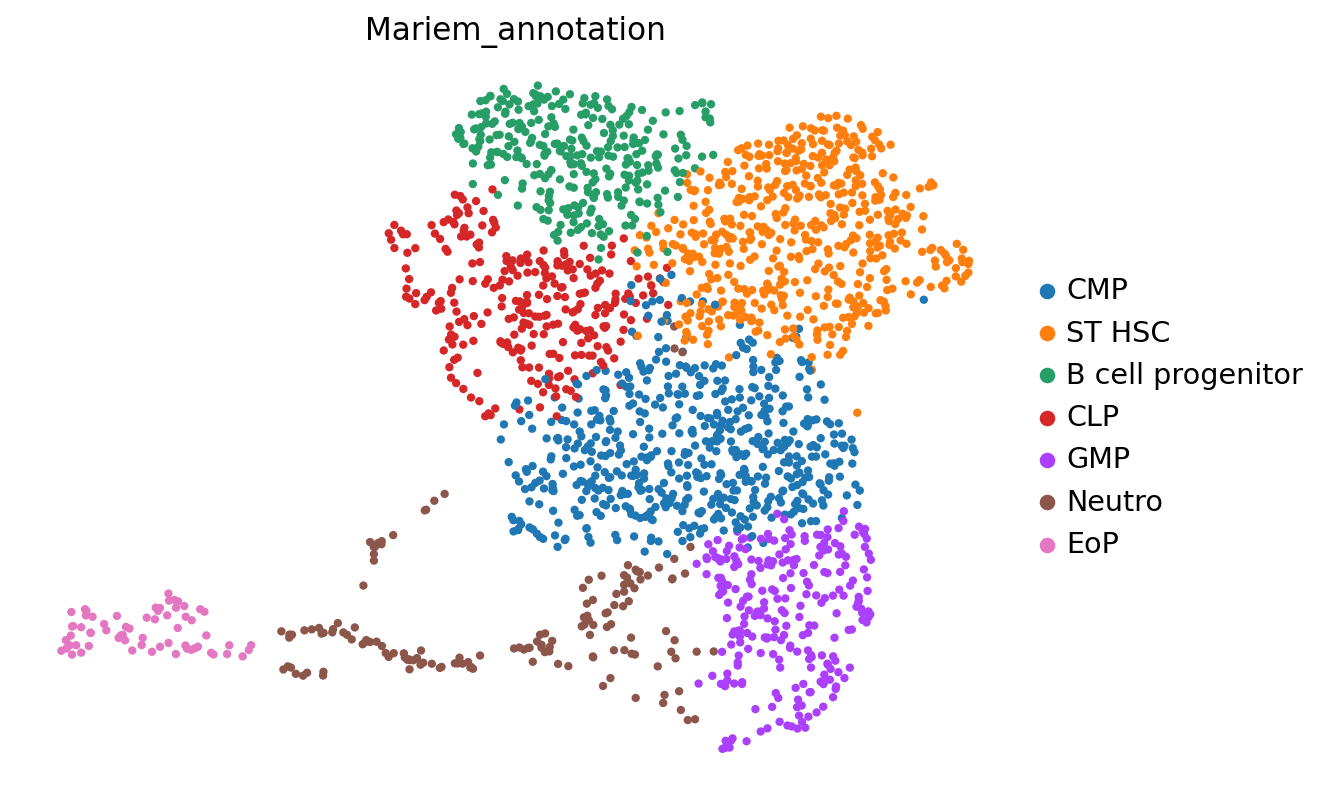

In [14]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    hvg_subset_HSC,
    basis="umap",
    color=['Mariem_annotation'],
    frameon=False,
    ncols=1,
    save = "HSC_leiden_manual_annotation_legend.pdf"
)

### Mature annotations 

In [15]:
hvg_subset_mature = sc.read_h5ad(filename = "hvg_mature_annotation.h5ad")
obs_plk = pd.read_pickle("hvg_mature_annotation.plk")
hvg_subset_mature.obs = obs_plk

In [16]:
sc.pp.normalize_total(hvg_subset_mature, target_sum=1e6)
sc.pp.log1p(hvg_subset_mature)

In [17]:
sc.tl.pca(hvg_subset_mature)
sc.pp.neighbors(hvg_subset_mature)
sc.tl.umap(hvg_subset_mature, random_state=46468856)

In [18]:
sc.tl.leiden(hvg_subset_mature, n_iterations=-1)

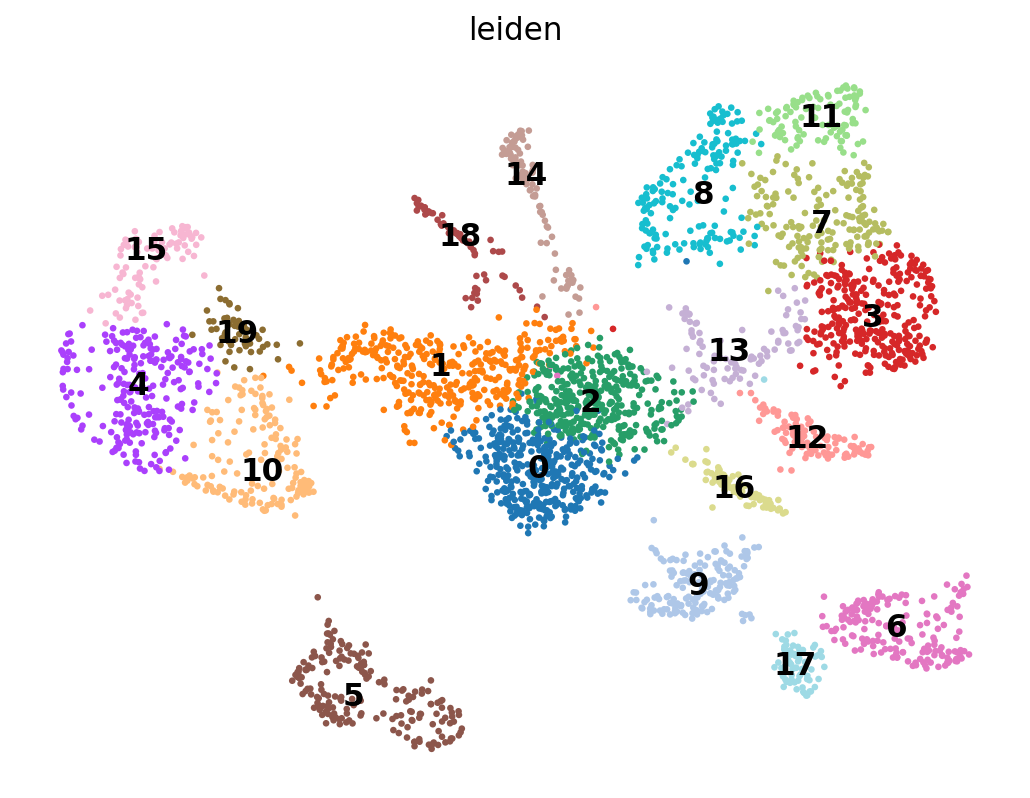

In [19]:
# sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])
sc.pl.embedding(
    hvg_subset_mature,
    basis="umap",
    color=['leiden'],
    frameon=False,
    ncols=1,
    legend_loc = "on data"
)

In [20]:
mature_cell_mapping = {"0":"Other",
               "1": "Neutrophil 1",
               "2": "Neutrophil 2",
               "3": "Macrophages",
               "4": "Baso/Mast",
               "5": "Dendritic",
               "6": "T",
               "7": "Monocyte 1",
               "8": "B early",
               "9": "Eosinophil",
               "10": "B mature",
               "11": "Progenitor",
               "12": "B mature",
               "13": "B mature",
               "14": "Monocyte 2",
               "15": "ILC",
               "16": "Neutrophil 3",
               "17": "Erythroblast"}

In [21]:
hvg_subset_mature.obs["Mariem_annotation"] = hvg_subset_mature.obs["leiden"].map(mature_cell_mapping)

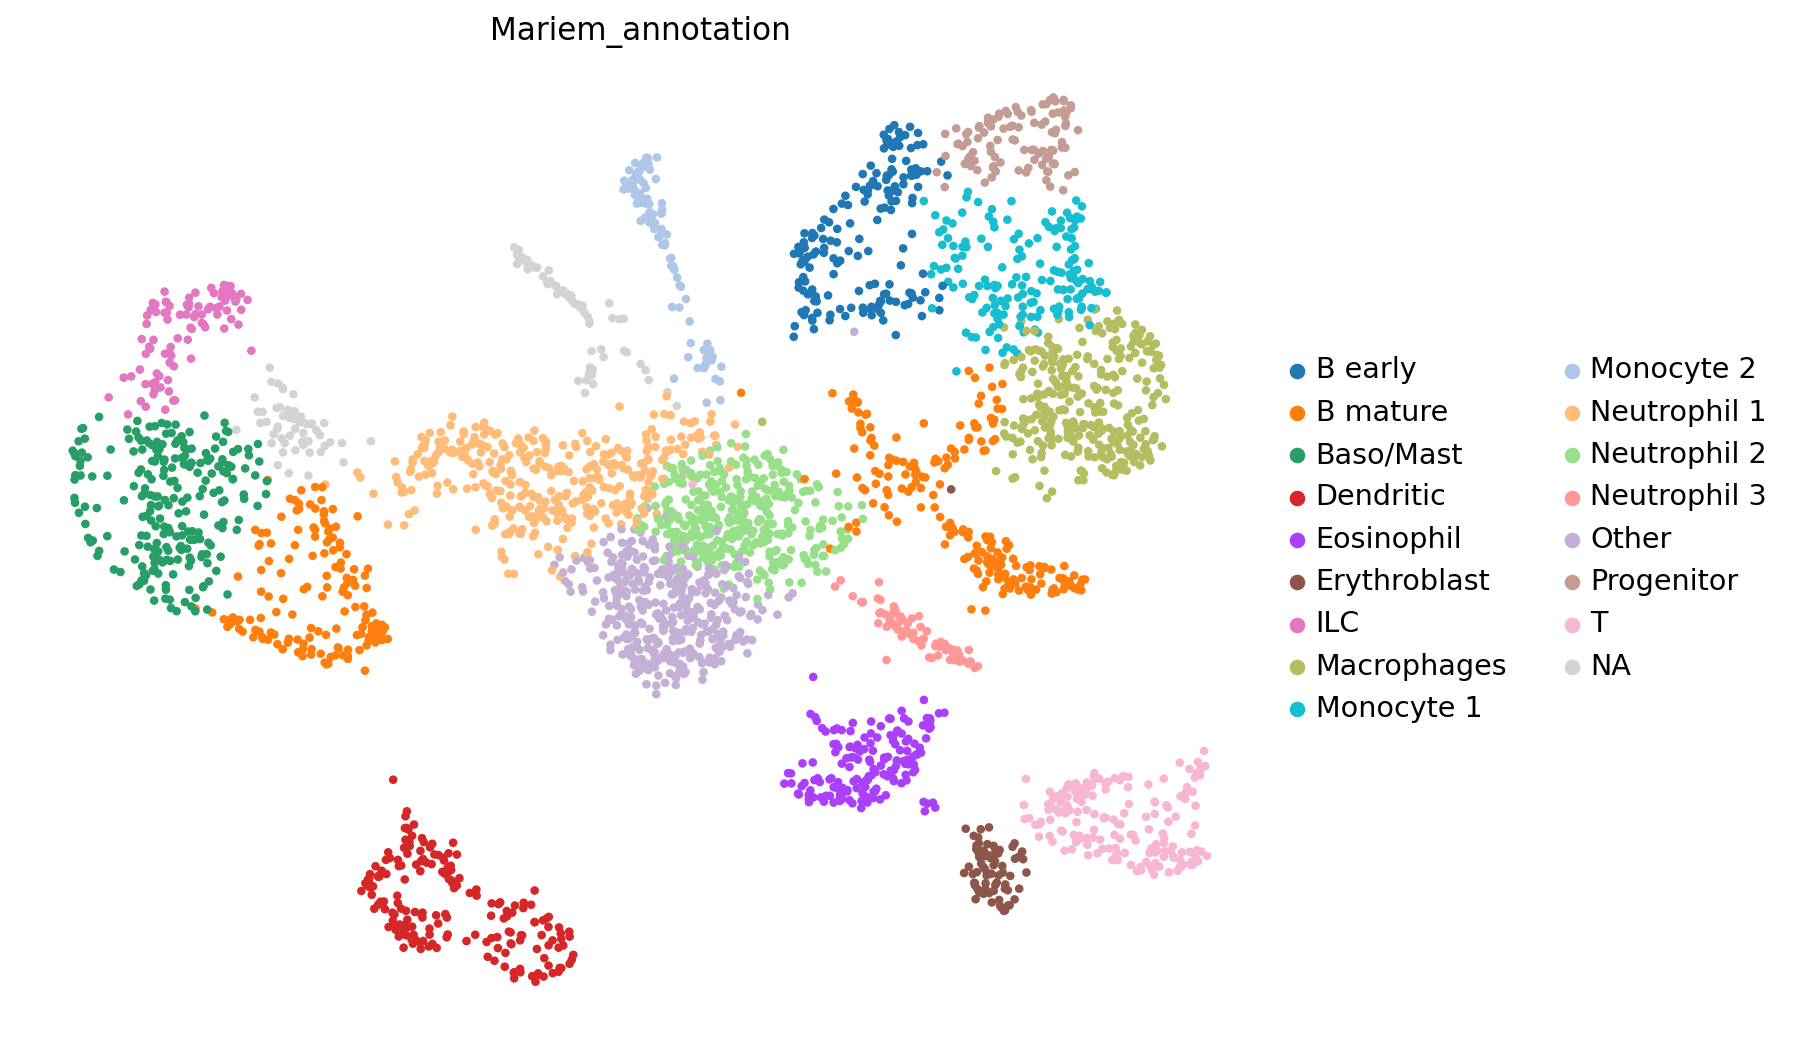

In [22]:
sc.set_figure_params(figsize = (10,8))
sc.pl.embedding(
    hvg_subset_mature,
    size = 60,
    basis="umap",
    color=['Mariem_annotation'],
    frameon=False,
    ncols=1,
    save = "mature_leiden_manual_annotation_legend.pdf"
)

### Reading annotated EOS 

In [23]:
eos_cp = eos_annotated.copy()

NameError: name 'eos_annotated' is not defined

In [ ]:
eos_cp.raw.to_adata()

In [ ]:
np.min(eos_cp.X)

In [ ]:
eos_annotated = sc.read_h5ad("eosinophil_allsamples.h5ad")

In [ ]:
eos_raw = sc.read_h5ad("eosinophil_allsamples_raw.h5ad")

In [ ]:
eos_raw.obs_names.equals(eos_annotated.obs_names)

In [ ]:
eos_raw = eos_raw[eos_annotated.obs_names]

In [ ]:
eos_raw.obs_names.equals(eos_annotated.obs_names)

In [ ]:
eos_raw.X.shape

In [ ]:
np.max(eos_raw.X)

In [ ]:
eos_annotated

In [ ]:
eos_annotated.raw.shape

In [ ]:
np.max(eos_annotated.X)

In [ ]:
np.min(eos_annotated.X)

In [ ]:
np.sum(np.isnan(eos_annotated.X))

In [ ]:
eos_annotated.obs['study_id'] = "Eos_study"

In [ ]:
eos_raw.obs['study_id'] = "Eos_study"

In [ ]:
eos_annotated.raw


In [ ]:
# eos_annotated.raw.to_adata()

In [ ]:
eos_annotated.obs

In [ ]:
eos_annotated.obs["annotated"].value_counts()

In [ ]:
eos_annotated.raw

In [ ]:
eos_mapping = {0 : "Eosinophil 1",
                1 : "Eosinophil 2",
                2 : "Eosinophil 3",
                3 : "Eosinophil 4",
                4 : "Neutrophil progenitors",
                5 : "Monocytes",
                6 : "Epithelial cells",
                7 : "B cells",
                8 : "Eosinophils 5 (mito high)",
                9 : "Epithelial cells",
                10 : "Stromal cells",
                11 : "Macrophages",
                12 : "Paneth cells",
                13 : "Plasma cells",
                14 : "Monocytes",
                15 : "T cells",
                16 : "Platelets"}

In [ ]:
eos_annotated.obs["cell_ontology_class"] = eos_annotated.obs["annotated"].map(eos_mapping)

In [ ]:
eos_raw.obs["cell_ontology_class"] = eos_annotated.obs["cell_ontology_class"]

In [ ]:
eos_raw.obs["cell_ontology_class"].value_counts()

In [ ]:
sc.pp.normalize_total(eos_raw, target_sum=1e6)
sc.pp.log1p(eos_raw)

In [ ]:
np.min(eos_raw.X.toarray())

In [ ]:
# sc.tl.pca(eos_raw, svd_solver='arpack')
# sc.pp.neighbors(eos_raw, n_neighbors=10, n_pcs=40)
# sc.tl.umap(eos_raw)

In [ ]:
sc.pl.embedding(
    eos_annotated,
    basis="umap",
    color=['annotated_cells'],
    frameon=False,
    ncols=1,
    legend_loc = "on data",
    save = "eos_paper_leiden_umap_on_data.pdf"
)

In [ ]:
SA_datasets = combined_datasets[combined_datasets.obs["study_id"].isin(['SA_pilot', 'SA_final'])]

In [ ]:
np.min(SA_datasets.X)

In [ ]:
SA_datasets.obs

In [ ]:
hvg_subset_HSC.obs

In [ ]:
hvg_subset_mature.obs

### Getting relevant cells

In [ ]:
hvg = sc.read("../output/hvg_integrated.h5ad")

In [ ]:
hvg_cells = hvg.obs_names
SA_dataset_names = SA_datasets.obs_names

SA_hvg_cells = [x for x in SA_dataset_names if x[:-2] in hvg_cells]


SA_cellname_counts = Counter([x[:-2] for x in SA_hvg_cells])
SA_unique_names = [x for x in SA_hvg_cells if SA_cellname_counts[x[:-2]] == 1]


SA_datasets_subset = SA_datasets[SA_unique_names]

SA_datasets_subset.obs_names = [x[:-2] for x in SA_datasets_subset.obs_names]

In [ ]:
hvg_subset_HSC.obs["Mariem_annotation"].value_counts()

In [ ]:
HSC_relevant_names = hvg_subset_HSC[hvg_subset_HSC.obs["Mariem_annotation"].isin(['EoP', 'Neutro', 'GMP', 'CMP'])].obs_names

In [ ]:
hvg_subset_mature.obs["Mariem_annotation"].value_counts()

In [ ]:
mature_relevant_names = hvg_subset_mature[hvg_subset_mature.obs["Mariem_annotation"].isin(['Eosinophil', 'Neutrophil 1', 'Neutrophil 2', 'Neutrophil 3', 'Macrophages', 'Monocyte 1', 'Monocyte 2',  'B mature', 'B early', 'Progenitor'])].obs_names

In [ ]:
SA_datasets_subset_relevant = SA_datasets_subset[HSC_relevant_names.union(mature_relevant_names)]

### Eos_annotation_data

In [ ]:
SA_datasets.obs["cell_ontology_class"].value_counts()

In [ ]:
eos_annotation_data = eos_raw.concatenate(SA_datasets_subset)

In [ ]:
eos_annotation_data.obs["cell_ontology_class"].value_counts()

In [ ]:
len(eos_annotated.var_names)

In [ ]:
SA_datasets_subset.var_names

In [ ]:
%%time
scnym_api(adata=eos_annotation_data,
          task='train',
          groupby='cell_ontology_class',
          out_path='./scnym_output_eos',
          config={
              'domain_groupby': 'study_id',
              'dan_use_conf_pseudolabels': False,
              'pseudolabel_min_confidence':.9
          })

In [ ]:
%%time
scnym_api(
    adata=eos_annotation_data,
    task='predict',
    key_added='scNym_eos',
    trained_model='./scnym_output_eos',
    out_path='./scnym_output_eos',
    config='new_identity_discovery'
)


In [ ]:
eos_annotation_data.obs

In [ ]:
SA_study_eos = eos_annotation_data[ eos_annotation_data.obs["study_id"] != "Eos_study"]

In [ ]:
SA_study_eos.obs["scNym_eos"].value_counts()

In [ ]:
SA_study_eos.obs_names

In [ ]:
exp_names = SA_study_eos.obs_names

SA_hvg_cells = [x for x in exp_names if x[:-2] in hvg_cells]


SA_cellname_counts = Counter([x[:-2] for x in SA_hvg_cells])
SA_unique_names = [x for x in SA_hvg_cells if SA_cellname_counts[x[:-2]] == 1]


SA_eos_subset = SA_study_eos[SA_unique_names]

SA_eos_subset.obs_names = [x[:-2] for x in SA_eos_subset.obs_names]

In [ ]:
SA_eos_subset = SA_eos_subset[hvg_subset_mature.obs_names.union(hvg_subset_HSC.obs_names)]

In [ ]:
hvg_subset_HSC.obs_names

In [ ]:
MA = hvg_subset_mature.obs["Mariem_annotation"].append(hvg_subset_HSC.obs["Mariem_annotation"])


In [ ]:
SA_eos_subset.obs["Mariem_annotation"] = MA[SA_eos_subset.obs_names]

In [ ]:
SA_eos_subset.obs["Mariem_annotation"]

In [ ]:
sc.tl.pca(SA_eos_subset, svd_solver='arpack')
sc.pp.neighbors(SA_eos_subset, n_neighbors=10, n_pcs=40)
sc.tl.umap(SA_eos_subset)

In [ ]:
SA_eos_subset.obs['Mariem_annotation']

In [ ]:
SA_eos_subset.obs["scNym_eos"].value_counts()

In [ ]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['scNym_eos', 'Mariem_annotation', 'scNym_eos_confidence'],
    frameon=False,
    ncols=1,
    save = "SA_EOS_centric_annotation.pdf"
)

In [ ]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['scNym_eos', 'Mariem_annotation', 'scNym_eos_confidence'],
    frameon=False,
    ncols=1,
    legend_loc='on data',
    save = "SA_EOS_centric_annotation_legendondata.pdf"
)

### Writing SA_eos_subset

In [ ]:
SA_eos_subset.obs.to_pickle("SA_eos_subset.plk")
SA_eos_subset.obs = SA_eos_subset.obs[["scNym_eos"]]
SA_eos_subset.write(filename = "SA_eos_subset.h5ad")

### Reading SA_eos

In [4]:
### Directory TM_hvg_subset_HSC_SA_ann_obs
SA_eos_subset = sc.read_h5ad(filename = "SA_eos_subset.h5ad")
obs_plk = pd.read_pickle("SA_eos_subset.plk")
SA_eos_subset.obs = obs_plk

In [5]:
# SA_eos_subset.write_loom(filename = "SA_eos_subset.loom")

In [6]:
hvg_subset_mature = sc.read_loom(filename = "hvg_subset_mature_MA_annotations_redone.loom")
hvg_subset_HSC = sc.read_loom(filename = "hvg_subset_HSC_MA_annotations_redone.loom")


/users/anna.hakobyan/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/users/anna.hakobyan/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
hvg_subset_mature.obs_names = hvg_subset_mature.obs["obs_names"]
hvg_subset_HSC.obs_names = hvg_subset_HSC.obs["obs_names"]

In [8]:
MA = hvg_subset_mature.obs["Mariem_annotation"].append(hvg_subset_HSC.obs["Mariem_annotation"])


/tmp/ipykernel_8565/2915613700.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MA = hvg_subset_mature.obs["Mariem_annotation"].append(hvg_subset_HSC.obs["Mariem_annotation"])


In [9]:
cond = hvg_subset_mature.obs["condition"].append(hvg_subset_HSC.obs["condition"])


/tmp/ipykernel_8565/994924470.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cond = hvg_subset_mature.obs["condition"].append(hvg_subset_HSC.obs["condition"])


In [10]:
MA

obs_names
AAACGCTTCTCCTGTG-1       Neutrophil
AAAGAACCACTACACA-1          B early
AAAGAACCAGCCGTCA-1         B mature
AAAGGATGTAGCTAAA-1    Basophil/Mast
AACAAAGGTGTTGCCG-1                T
                          ...      
TTTGATCCATTACGGT-1              CMP
TTTGGAGCACTCCACT-1              HSC
TTTGGTTCAATCAAGA-1              CLP
TTTGGTTCAGGTGTGA-1              CLP
TTTGGTTTCAAGTAAG-1              HSC
Name: Mariem_annotation, Length: 5514, dtype: object

In [11]:
SA_eos_subset.obs["Mariem_annotation"] = MA[SA_eos_subset.obs_names]
SA_eos_subset.obs["condition"] = cond[SA_eos_subset.obs_names]


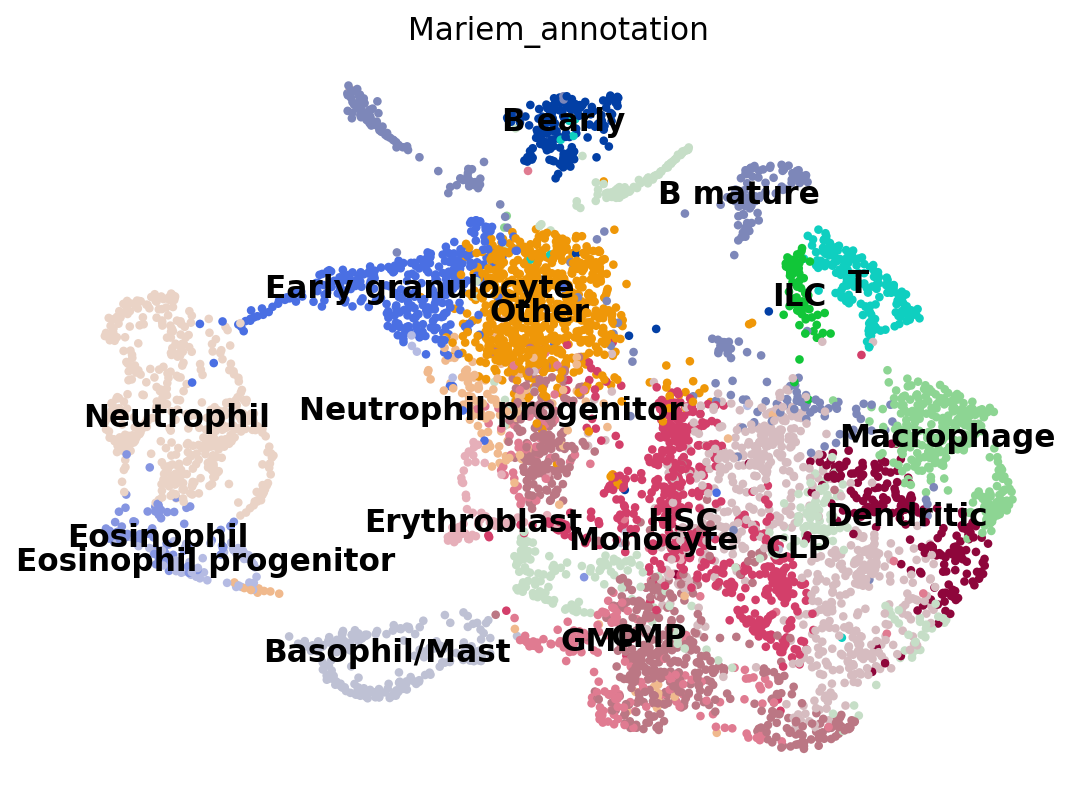

In [42]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['Mariem_annotation'],
    frameon=False,
    ncols=1,
    legend_loc='on data',
    size = 60,
    save = "all_celltypes_reannotated_ondata.pdf"
)

In [43]:
SA_eos_subset.obs["Mariem_annotation"].cat.categories

Index(['B early', 'B mature', 'Basophil/Mast', 'CLP', 'CMP', 'Dendritic',
       'Early granulocyte', 'Eosinophil', 'Eosinophil progenitor',
       'Erythroblast', 'GMP', 'HSC', 'ILC', 'Macrophage', 'Monocyte',
       'Neutrophil', 'Neutrophil progenitor', 'Other', 'T'],
      dtype='object')

In [38]:
SA_eos_subset.uns["Mariem_annotation_colors"]

array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1'],
      dtype=object)

In [46]:
color_mapping = dict( zip(SA_eos_subset.obs["Mariem_annotation"].cat.categories, 
                          SA_eos_subset.uns["Mariem_annotation_colors"]))

In [48]:
color_mapping = {
'B early': '#023fa5',
 'B mature': '#7d87b9',
 'Basophil/Mast': '#bec1d4',
 'CLP': '#d6bcc0',
 'CMP': '#bb7784',
 'Dendritic': '#8e063b',
 'Early granulocyte': '#4a6fe3',
 'Eosinophil': '#8595e1',
 'Eosinophil progenitor': '#b5bbe3',
 'Erythroblast': '#e6afb9',
 'GMP': '#e07b91',
 'HSC': '#d33f6a',
 'ILC': '#11c638',
 'Macrophage': '#8dd593',
 'Monocyte': '#c6dec7',
 'Other': '#ead3c6',
 'Neutrophil progenitor': '#f0b98d',
 'Neutrophil': '#ff9999',
 # 'Neutrophil': '#000000',
 'T': '#0fcfc0'}


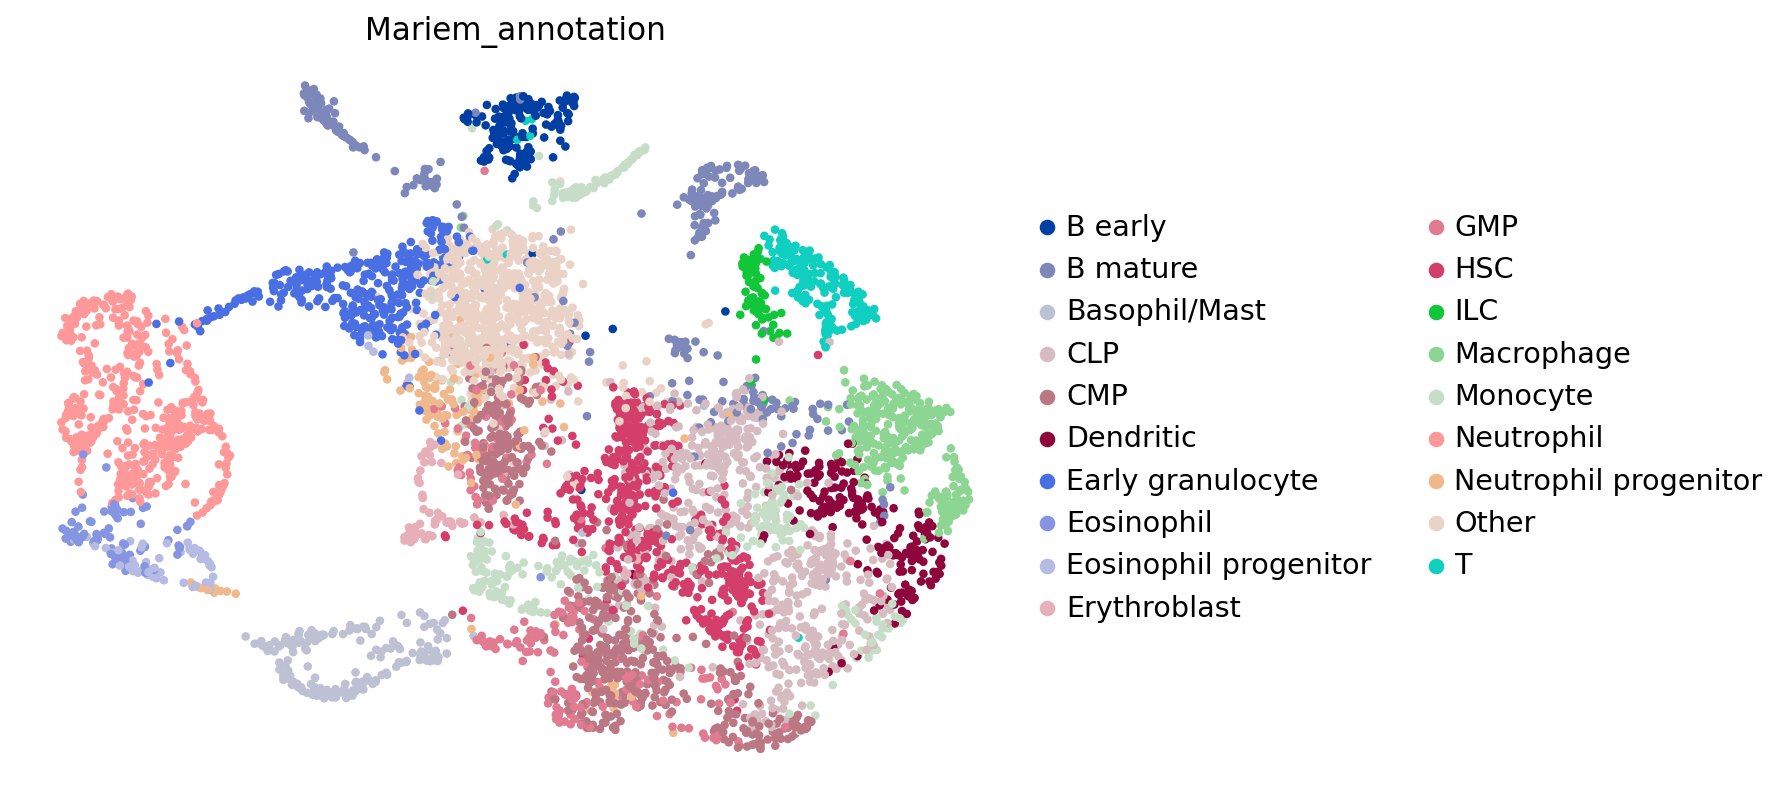

In [49]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['Mariem_annotation'],
    frameon=False,
    ncols=1,
    # legend_loc='on data',
    size = 60,
    palette = color_mapping,
    save = "all_celltypes_reannotated.pdf"
)

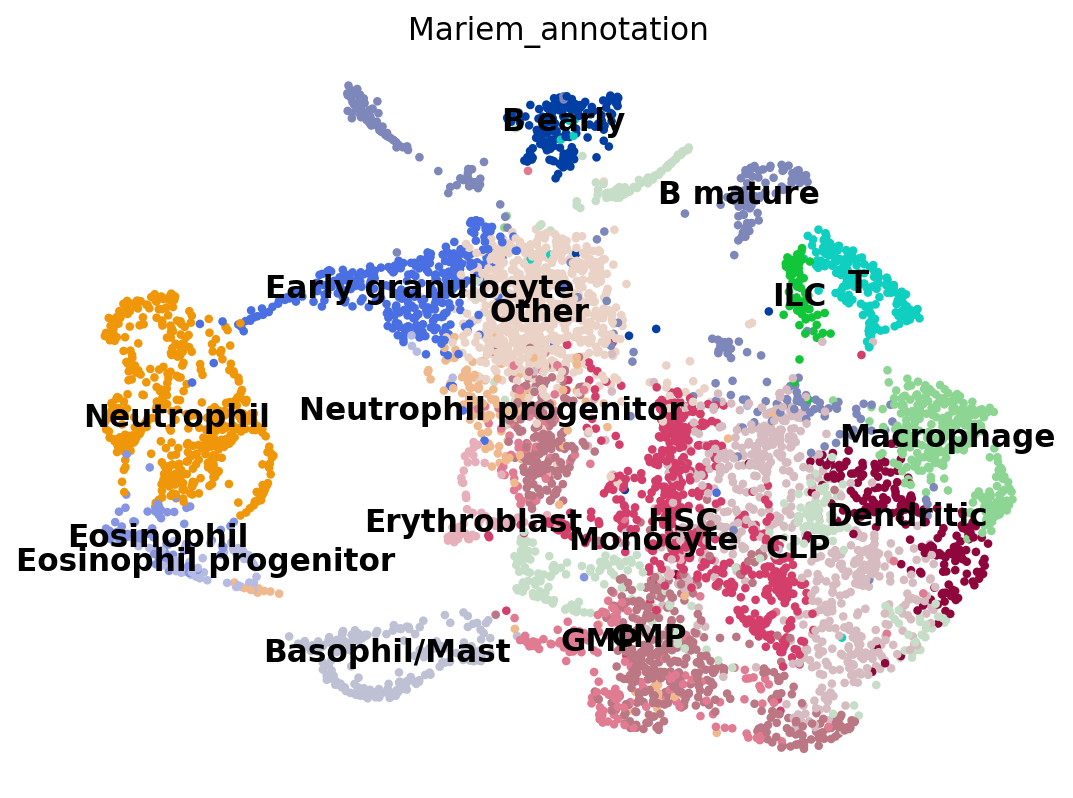

In [54]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['Mariem_annotation'],
    frameon=False,
    ncols=1,
    legend_loc='on data',
    size = 60,
    palette = color_mapping,
    save = "all_celltypes_reannotated_ondata.pdf"
)

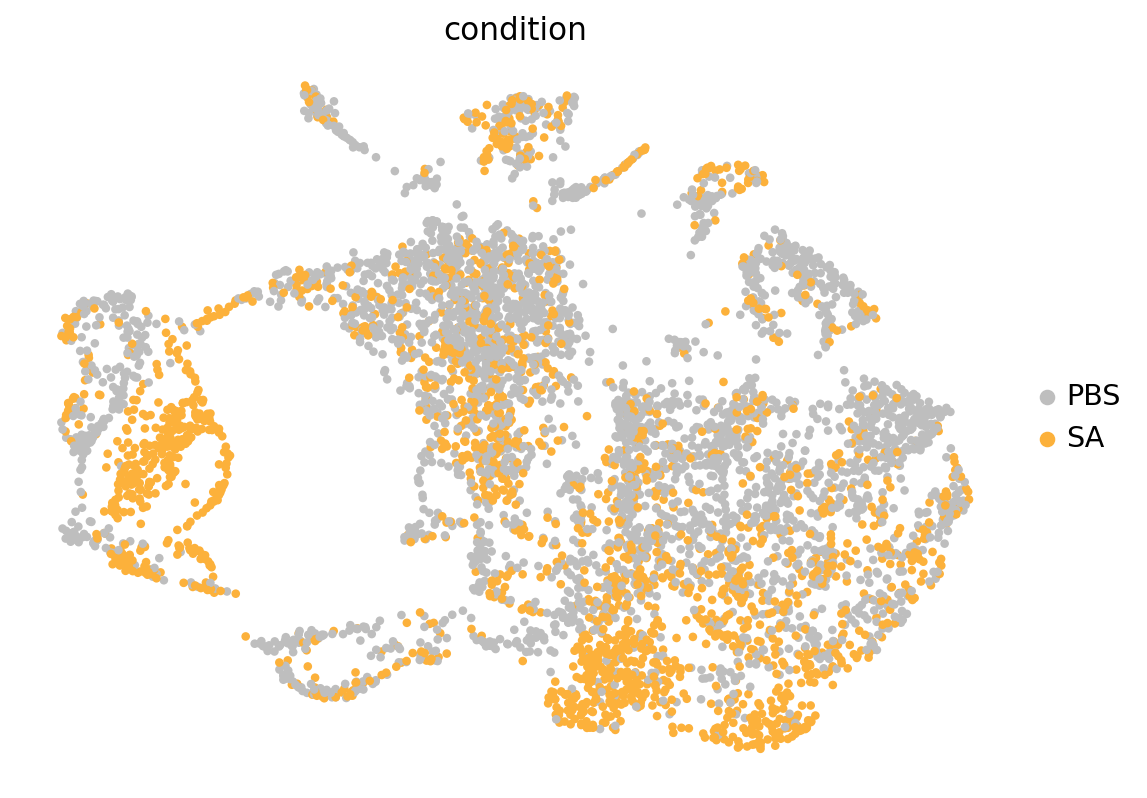

In [19]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['condition'],
    frameon=False,
    ncols=1,
    # legend_loc='on data',
    size = 60,
    palette = {"PBS": "#BEBEBE", "SA": "#fcb13b"},
    save = "all_celltypes_reannotated_SA_vs_PBS.pdf"
)

In [46]:
hvg_subset_mature.obs

HTO_classification  HTO_margin HTO_maxID HTO_secondID  \
obs_names                                                                  
AAACGCTTCTCCTGTG-1            HTO-SA4    3.358051   HTO-SA4      HTO-SA3   
AAAGAACCACTACACA-1           HTO-PBS4    2.674194  HTO-PBS4     HTO-PBS3   
AAAGAACCAGCCGTCA-1            HTO-SA3    1.796318   HTO-SA3      HTO-SA4   
AAAGGATGTAGCTAAA-1            HTO-SA3    2.314723   HTO-SA3     HTO-PBS3   
AACAAAGGTGTTGCCG-1           HTO-PBS3    3.702049  HTO-PBS3     HTO-PBS4   
...                               ...         ...       ...          ...   
TTTGGAGCACGGTGCT-1            HTO-SA1    2.929597   HTO-SA1     HTO-PBS2   
TTTGGTTCAGAGACTG-1           HTO-PBS1    2.948510  HTO-PBS1     HTO-PBS2   
TTTGTTGAGCACGATG-1           HTO-PBS1    3.615213  HTO-PBS1     HTO-PBS2   
TTTGTTGGTCCACTCT-1           HTO-PBS2    1.679065  HTO-PBS2      HTO-SA1   
TTTGTTGGTCCTGGTG-1           HTO-PBS2    1.514226  HTO-PBS2     HTO-PBS1   

                   Mariem_annotation RNA_snn_res.0.6 SCT_snn_res.0.8  \
obs_names                                                              
AAACGCTTCTCCTGTG-1        Neutrophil               3               6   
AAAGAACCACTACACA-1           B early               4               4   
AAAGAACCAGCCGTCA-1          B mature               4               9   
AAAGGATGTAGCTAAA-1     Basophil/Mast               8               7   
AACAAAGGTGTTGCCG-1                 T              10              10   
...                              ...             ...             ...   
TTTGGAGCACGGTGCT-1          Monocyte               2               2   
TTTGGTTCAGAGACTG-1        Macrophage               6               4   
TTTGTTGAGCACGATG-1        Macrophage               6               4   
TTTGTTGGTCCACTCT-1             Other               0               7   
TTTGTTGGTCCTGGTG-1        Macrophage               6               4   

                    _scvi_batch  _scvi_labels  batch condition   hash.ID  \
obs_names                                                                  
AAACGCTTCTCCTGTG-1            1             0  final        SA   HTO-SA4   
AAAGAACCACTACACA-1            1             0  final       PBS  HTO-PBS4   
AAAGAACCAGCCGTCA-1            1             0  final        SA   HTO-SA3   
AAAGGATGTAGCTAAA-1            1             0  final        SA   HTO-SA3   
AACAAAGGTGTTGCCG-1            1             0  final       PBS  HTO-PBS3   
...                         ...           ...    ...       ...       ...   
TTTGGAGCACGGTGCT-1            0             0  pilot        SA   HTO-SA1   
TTTGGTTCAGAGACTG-1            0             0  pilot       PBS  HTO-PBS1   
TTTGTTGAGCACGATG-1            0             0  pilot       PBS  HTO-PBS1   
TTTGTTGGTCCACTCT-1            0             0  pilot       PBS  HTO-PBS2   
TTTGTTGGTCCTGGTG-1            0             0  pilot       PBS  HTO-PBS2   

                   immgen_labels leiden mature_annotation  nCount_HTO  \
obs_names                                                               
AAACGCTTCTCCTGTG-1   Neutrophils      2       granulocyte       306.0   
AAAGAACCACTACACA-1    Stem cells      7            B cell       199.0   
AAAGAACCAGCCGTCA-1       B cells     10            B cell        79.0   
AAAGGATGTAGCTAAA-1     Basophils      5          basophil       157.0   
AACAAAGGTGTTGCCG-1      NK cells      6            T cell       992.0   
...                          ...    ...               ...         ...   
TTTGGAGCACGGTGCT-1    Stem cells      9          monocyte       455.0   
TTTGGTTCAGAGACTG-1       B cells      3        macrophage       676.0   
TTTGTTGAGCACGATG-1       B cells      3        macrophage       962.0   
TTTGTTGGTCCACTCT-1       B cells      0            B cell        69.0   
TTTGTTGGTCCTGGTG-1       B cells      3        macrophage        45.0   

                    nCount_RNA  nCount_SCT  nFeature_HTO  nFeature_RNA  \
obs_names                                                                
AAACGC

In [12]:
bm_velo = sc.read_loom(filename = "bm_velo_cell_cycle.loom")
bm_velo.obs_names = bm_velo.obs["obs_names"]
cell_cycle = bm_velo.obs["cell_cycle_phase"]

/users/anna.hakobyan/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [13]:
bm_velo.obs

Cluster HTO_classification  HTO_margin HTO_maxID  \
obs_names                                                                 
AAACCCAAGTCAGGGT-1         HSC           HTO-PBS1    2.613203  HTO-PBS1   
AAACCCACACAAAGCG-1   Dendritic           HTO-PBS1    2.907278  HTO-PBS1   
AAACCCACAGGATTCT-1  Neutrophil            HTO-SA1    2.448419   HTO-SA1   
AAACCCAGTCTCACGG-1       Other            HTO-SA1    1.431069   HTO-SA1   
AAACCCAGTTCAGGTT-1         HSC           HTO-PBS1    3.083565  HTO-PBS1   
...                        ...                ...         ...       ...   
TTTGGAGGTAAGTTAG-1         CLP            HTO-SA4    2.943279   HTO-SA4   
TTTGGAGTCGATTTCT-1       Other           HTO-PBS4    1.956828  HTO-PBS4   
TTTGGTTCAACTGCCG-1    B mature           HTO-PBS4    1.985128  HTO-PBS4   
TTTGGTTCACAGCGCT-1         CLP           HTO-PBS3    2.837423  HTO-PBS3   
TTTGTTGAGTATGGCG-1     B early           HTO-PBS4    2.756720  HTO-PBS4   

                   HTO_secondID MA_annotation RNA_snn_res.0.6 SCT_snn_res.0.8  \
obs_names                                                                       
AAACCCAAGTCAGGGT-1     HTO-PBS2           HSC               5               5   
AAACCCACACAAAGCG-1     HTO-PBS2     Dendritic               6               4   
AAACCCACAGGATTCT-1     HTO-PBS2    Neutrophil               7               6   
AAACCCAGTCTCACGG-1     HTO-PBS2         Other               1               0   
AAACCCAGTTCAGGTT-1     HTO-PBS2           HSC               5               5   
...                         ...           ...             ...             ...   
TTTGGAGGTAAGTTAG-1      HTO-SA3           CLP               5               1   
TTTGGAGTCGATTTCT-1     HTO-PBS3         Other               2               3   
TTTGGTTCAACTGCCG-1     HTO-PBS3      B mature               6               9   
TTTGGTTCACAGCGCT-1     HTO-PBS4           CLP               2               2   
TTTGTTGAGTATGGCG-1     HTO-PBS3       B early               4               4   

                    Size_Factor  _scvi_batch  _scvi_labels  batch  \
obs_names                                                           
AAACCCAAGTCAGGGT-1     0.858351            0             0  pilot   
AAACCCACACAAAGCG-1     0.858351            0             0  pilot   
AAACCCACAGGATTCT-1     5.460888            0             0  pilot   
AAACCCAGTCTCACGG-1     0.424947            0             0  pilot   
AAACCCAGTTCAGGTT-1     0.938689            0             0  pilot   
...                         ...          ...           ...    ...   
TTTGGAGGTAAGTTAG-1     3.505286            1             0  final   
TTTGGAGTCGATTTCT-1     0.553911            1             0  final   
TTTGGTTCAACTGCCG-1     0.382664            1             0  final   
TTTGGTTCACAGCGCT-1     1.556025            1             0  final   
TTTGTTGAGTATGGCG-1     0.334038            1             0  final   

                   cell_cycle_phase  control_point_pca   hash.ID  \
obs_names                                                          
AAACCCAAGTCAGGGT-1                S                  0  HTO-PBS1   
AAACCCACACAAAGCG-1             G2-M                  0  HTO-PBS1   
AAACCCACAGGATTCT-1                S                  0   HTO-SA1   
AAACCCAGTCTCACGG-1             G1-S                  0   HTO-SA1   
AAACCCAGTTCAGGTT-1             M-G1                  0  HTO-PBS1   
...                             ...                ...       ...   
TTTGGAGGTAAGTTAG-1                M                  0   HTO-SA4   
TTTGGAGTCGATTTCT-1             G1-S                  0  HTO-PBS4   
TTTGGTTCAACTGCCG-1                S                  1  HTO-PBS4   
TTTGGTTCACAGCGCT-1             G1-S                  0  HTO-PBS3   
TTTGTTGAGTATGGCG-1                S                  0  HTO-PBS4   

                   immgen_labels  initial_cell_size  initial_size  \
obs_names                                                           
AAACCCAAGTCAGGGT-1    Stem cells              406.0         297.0   
AAA

In [16]:
SA_eos_subset.obs["cell_cycle"] = cell_cycle[SA_eos_subset.obs_names]


In [17]:
cell_cycle_colors = {
    "G1-S":"#0369a0", 
    "G2-M" : "#a45167",
    "M": "#9684b1", 
    "M-G1": "#9fb184", 
    "S": "#e9c89e"}

In [18]:
cell_cycle_colors = {
    "G1-S":"#e9c89e", 
    "G2-M" : "#0369a0",
    "M": "#9684b1", 
    "M-G1": "#9fb184", 
    "S": "#a45167"}

In [19]:
cell_cycle_colors = {
    "G1-S":"#e9c89e", 
    "G2-M" : "#0369a0",
    "M": "#9684b1", 
    "M-G1": "#9fb184", 
    "S": "#a45167"}

In [22]:
SA_eos_subset.obs['cell_cycle'].cat.reorder_categories(["G1-S", "S", "G2-M", "M", "M-G1"], inplace=True)

/tmp/ipykernel_8565/3150411945.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  SA_eos_subset.obs['cell_cycle'].cat.reorder_categories(["G1-S", "S", "G2-M", "M", "M-G1"], inplace=True)


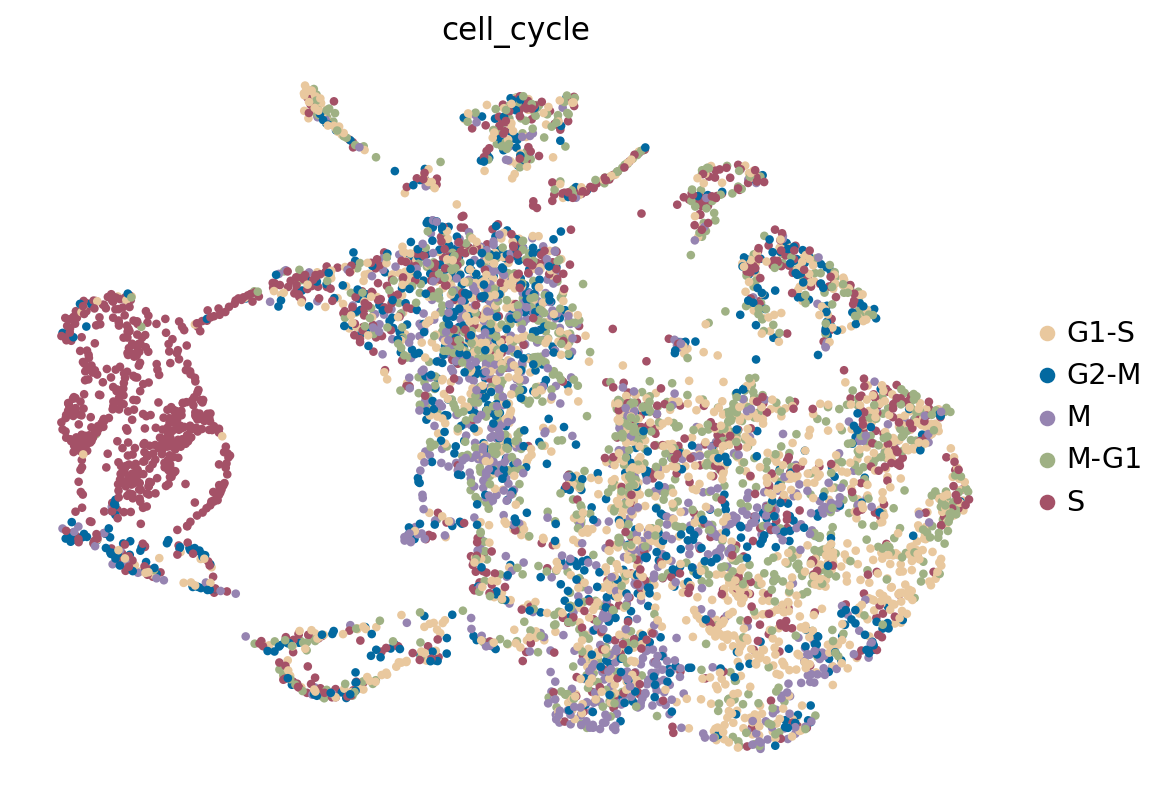

In [21]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['cell_cycle'],
    frameon=False,
    ncols=1,
    # legend_loc='on data',
    size = 60,
    palette = cell_cycle_colors,
    # save = "all_celltypes_reannotated_cell_cycle.pdf"
)

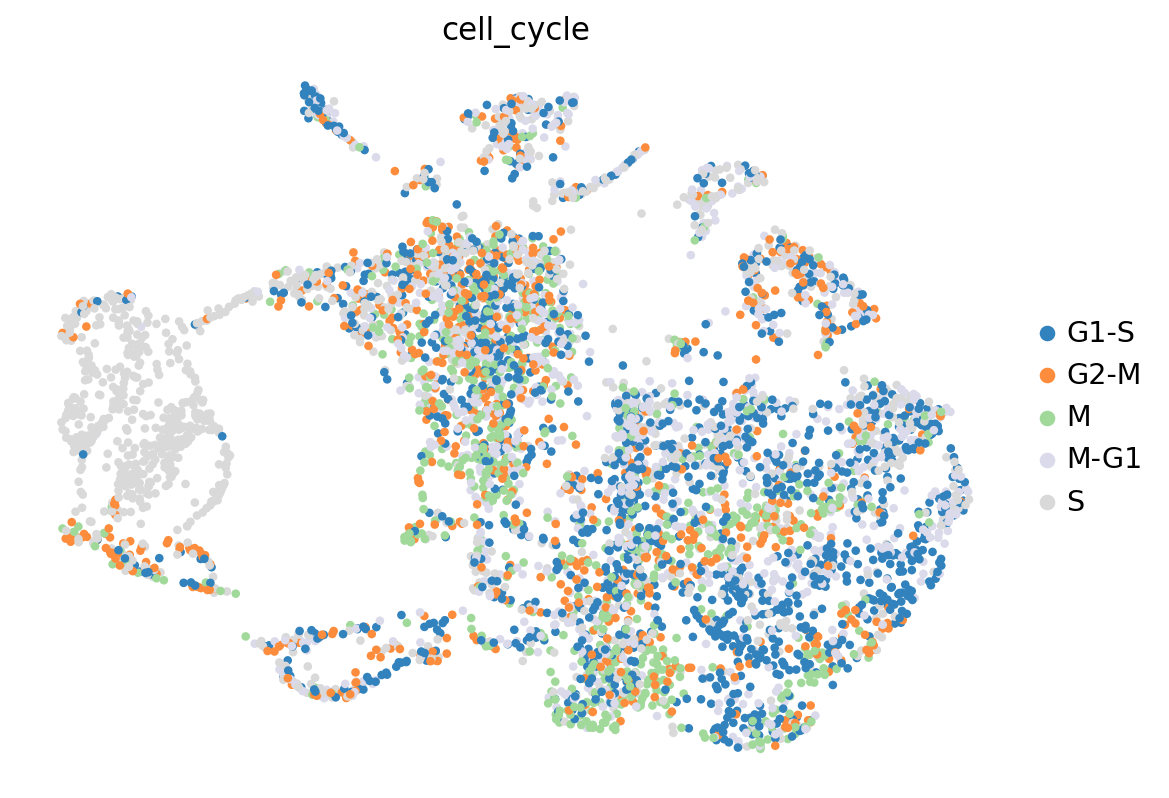

In [60]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['cell_cycle'],
    frameon=False,
    ncols=1,
    # legend_loc='on data',
    size = 60,
    palette = "tab20c",
    # save = "all_celltypes_reannotated_cell_cycle.pdf"
)

In [65]:
CC_color_mapping = dict( zip(SA_eos_subset.obs["cell_cycle"].cat.categories, 
                          SA_eos_subset.uns["cell_cycle_colors"]))

In [29]:
CC_color_mapping = {'G1-S': '#dadaeb',
 'S': '#F06E54',
 'M': '#a1d99b',
 'M-G1': '#3182bd',
 'G2-M': '#E7DB8A'}

In [27]:
CC_color_mapping = {'G1-S': '#dadaeb',
 'S': '#8B0000',
 'M': '#a1d99b',
 'M-G1': '#3182bd',
 'G2-M': '#E7DB8A'}

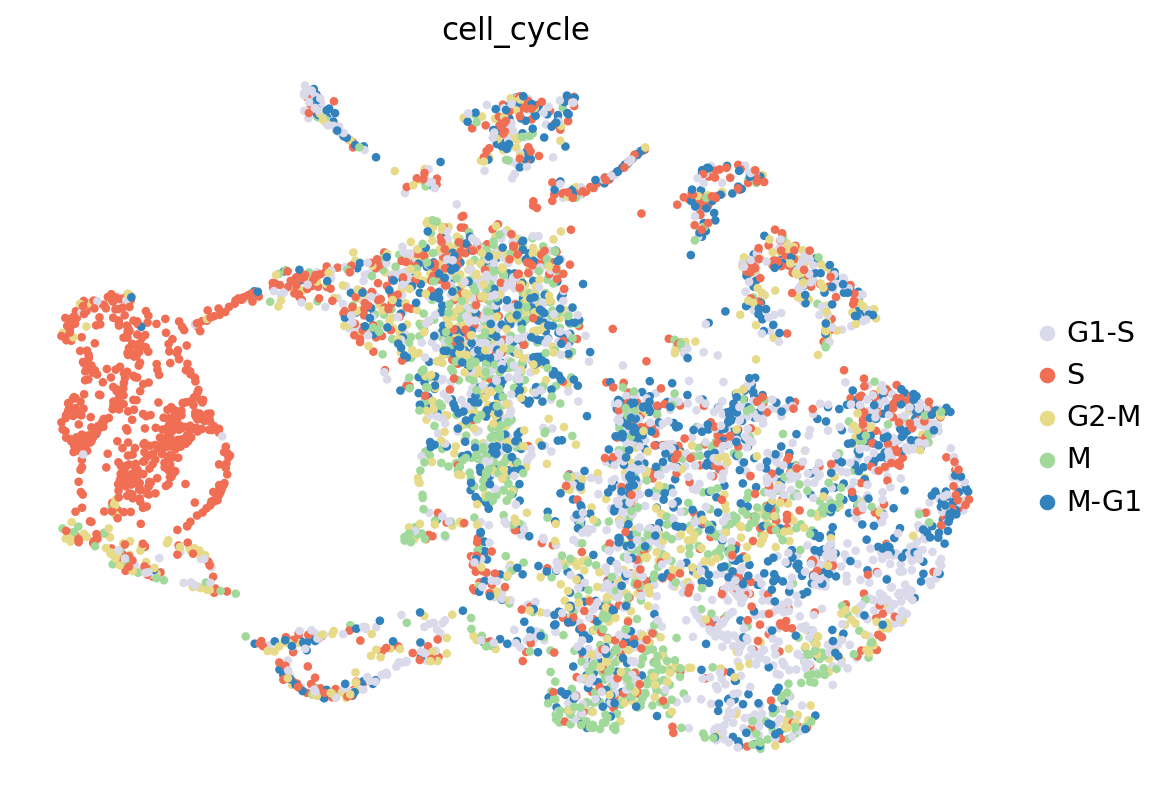

In [30]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['cell_cycle'],
    frameon=False,
    ncols=1,
    # legend_loc='on data',
    size = 60,
    palette = CC_color_mapping,
    # save = "all_celltypes_reannotated_cell_cycle.pdf"
)

In [64]:
SA_eos_subset.uns["cell_cycle_colors"]

['#3182bd', '#fd8d3c', '#a1d99b', '#dadaeb', '#d9d9d9']

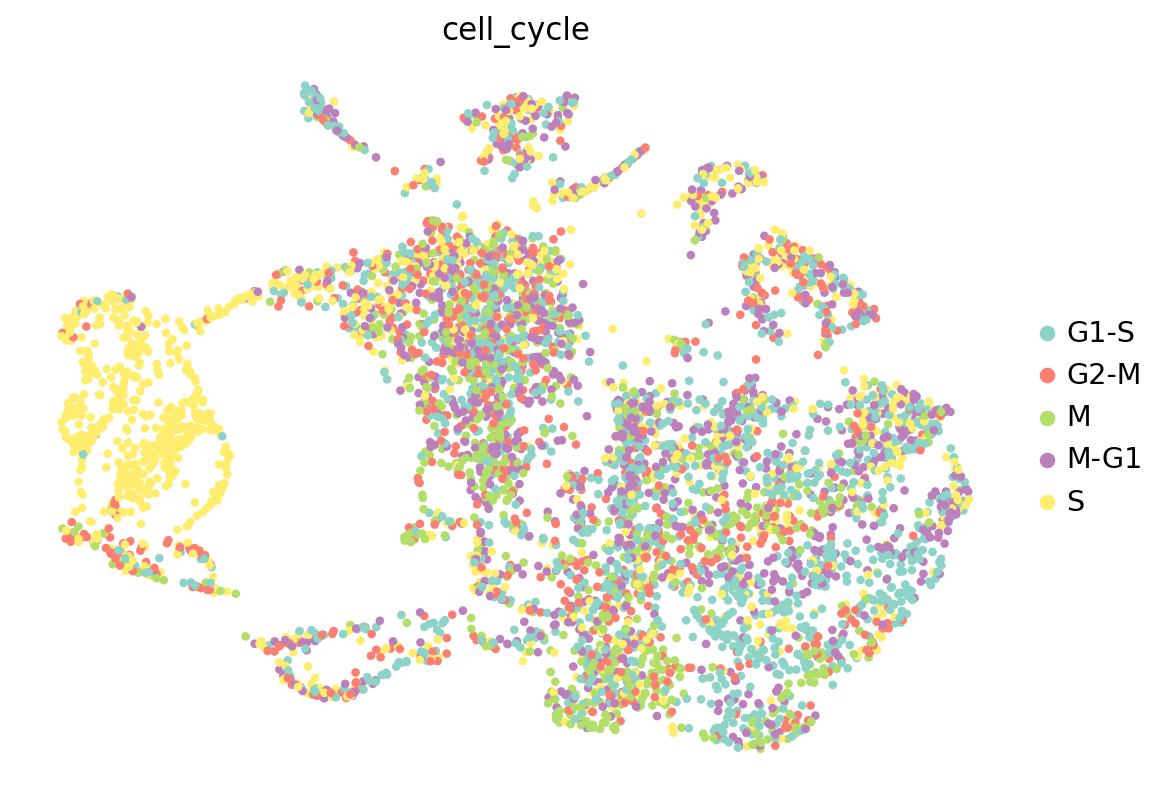

In [59]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['cell_cycle'],
    frameon=False,
    ncols=1,
    # legend_loc='on data',
    size = 60,
    palette = "Set3",
    # save = "all_celltypes_reannotated_cell_cycle.pdf"
)

In [31]:
cell_cycle_colors = {
    "G1-S":"#7d87b9", 
    "G2-M" : "#e07b91",
    "M": "#0fcfc0", 
    "M-G1": "#c6dec7", 
    "S": "#d33f6a"}

In [ ]:
color_mapping = {
'B early': '#023fa5',
 'B mature': '#7d87b9',
 'Basophil/Mast': '#bec1d4',
 'CLP': '#d6bcc0',
 'CMP': '#bb7784',
 'Dendritic': '#8e063b',
 'Early granulocyte': '#4a6fe3',
 'Eosinophil': '#8595e1',
 'Eosinophil progenitor': '#b5bbe3',
 'Erythroblast': '#e6afb9',
 'GMP': '#e07b91',
 'HSC': '#d33f6a',
 'ILC': '#11c638',
 'Macrophage': '#8dd593',
 'Monocyte': '#c6dec7',
 'Other': '#ead3c6',
 'Neutrophil progenitor': '#f0b98d',
 'Neutrophil': '#ef9708',
 'T': '#0fcfc0'}


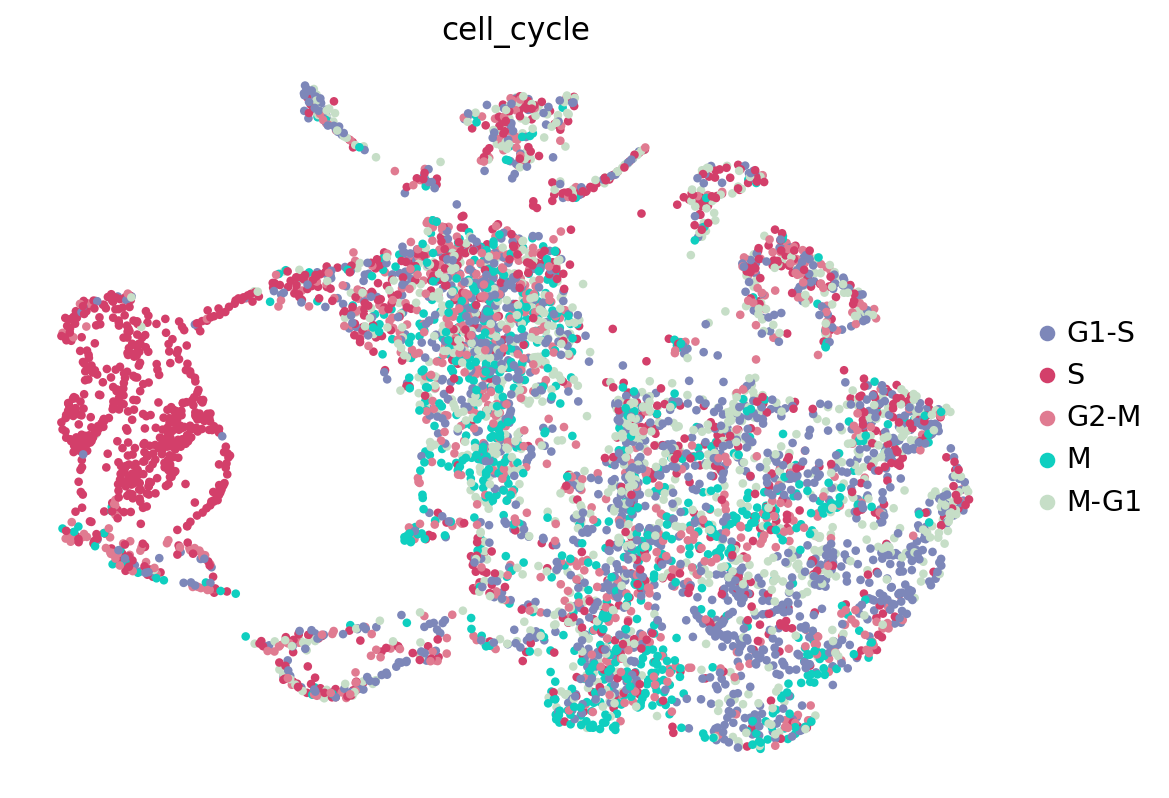

In [33]:
sc.set_figure_params(figsize = (8,6))
sc.pl.embedding(
    SA_eos_subset,
    basis="umap",
    color=['cell_cycle'],
    frameon=False,
    ncols=1,
    # legend_loc='on data',
    size = 60,
    palette = cell_cycle_colors,
    save = "all_celltypes_reannotated_cell_cycle.pdf"
)